In [37]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

matplotlib.rc('xtick', labelsize=13) 
matplotlib.rc('ytick', labelsize=13) 

In [38]:
#This notebook is designed for generating all plots used in report & ppt
#Except avg plots that generate through differnt subreddits and is included in avg_plot.ipynb
#loading Results from All Experiments

In [39]:
data_path= ""
df_eli5 = pd.read_csv(data_path + "experiments_tr_sample_num_eli5_tr_samples_metrics.csv", index_col=0)

In [50]:
df_worldnews = pd.read_csv(data_path + "experiments_tr_sample_num_worldnews_tr_samples_metrics.csv", index_col=0)

In [41]:
df_gaming = pd.read_csv(data_path + "experiments_tr_sample_num_gaming_tr_samples_metrics.csv", index_col=0)

In [42]:
df_news = pd.read_csv(data_path + "experiments_tr_sample_num_news_tr_samples_metrics.csv", index_col=0)

In [43]:
df_todayilearned = pd.read_csv(data_path + "experiments_tr_sample_num_todayilearned_tr_samples_metrics.csv", index_col=0)

In [44]:
df_AskReddit = pd.read_csv(data_path + "experiments_tr_sample_num_AskReddit_tr_samples_metrics.csv", index_col=0)

In [45]:
# Mark all the subreddit-method pairs in order for grouping and plotting in latter part

order_dict = {
    
    'SAR_AskReddit' : 1,
    'SAR_worldnews' : 2,
    'SAR_news' : 3,
    'SAR_todayilearned' : 4,
    'SAR_gaming' : 5,
    'SAR_eli5' : 6,
    'SAR2_AskReddit' :7,
    'SAR2_worldnews' : 8,
    'SAR2_news' : 9,
    'SAR2_todayilearned' : 10,
    'SAR2_gaming' : 11,
    'SAR2_eli5' : 12,
    'SHR_AskReddit' : 13,
    'SHR_worldnews' : 14,
    'SHR_news' : 15,
    'SHR_todayilearned' : 16,
    'SHR_gaming' : 17,
    'SHR_eli5' : 18,
    'KOP_AskReddit' : 19,
    'KOP_worldnews' : 20,
    'KOP_news' : 21,
    'KOP_todayilearned' : 22,
    'KOP_gaming' : 23,
    'KOP_eli5' : 24,
    'NAR_AskReddit' : 25,
    'NAR_worldnews' : 26,
    'NAR_news' : 27,
    'NAR_todayilearned' : 28,
    'NAR_gaming' : 29,
    'NAR_eli5' : 30,
    'BERT_AskReddit' : 31,
    'BERT_worldnews' : 32,
    'BERT_news' : 33,
    'BERT_todayilearned' : 34,
    'BERT_gaming' : 35,
    'BERT_eli5' : 36,
    
    
    
    
    
    
    

}

In [46]:
df_eli5["order"] = df_eli5.method.apply(lambda x: order_dict[x])

In [51]:
df_worldnews["order"] = df_worldnews.method.apply(lambda x: order_dict[x])

In [52]:
df_gaming["order"] = df_gaming.method.apply(lambda x: order_dict[x])

In [53]:
df_news["order"] = df_news.method.apply(lambda x: order_dict[x])

In [54]:
df_todayilearned["order"] = df_todayilearned.method.apply(lambda x: order_dict[x])

In [55]:
df_AskReddit["order"] = df_AskReddit.method.apply(lambda x: order_dict[x])

In [56]:
df_AskReddit = df_AskReddit.rename(columns={'method': 'Method'})
df_AskReddit.loc[df_AskReddit['Method'].isin(['KOP_AskReddit', 'SAE', 'SAR3', 'NAR_AskReddit']), 'Method type'] = 'similarity-based' 
df_AskReddit.loc[df_AskReddit['Method'].isin(['BERT_AskReddit', 'SAR_AskReddit', 'SAR2_AskReddit', 'SHR_AskReddit']), 'Method type'] = 'classification' 
df_AskReddit.head()

,num_authors,type,Method,num_training,train_path,test_path,top_1,top_5,top_10,top_100,auroc_1,auroc_2,auroc_3,tpr,fpr,order,Method type
8b050cf1-5fa0-41c8-a49f-729390373ea9,100,intra_context,NAR_AskReddit,2,data/processed_AskReddit.csv,data/processed_AskReddit.csv,0.060000,0.180000,0.260000,1.0,NaN,NaN,NaN,NaN,NaN,25,similarity-based
920a7f1c-0f2b-4672-bae3-16a4988629bd,100,cross_context,NAR_AskReddit,2,data/processed_AskReddit.csv,data/processed_AskReddit.csv,0.055276,0.155779,0.241206,1.0,NaN,NaN,NaN,NaN,NaN,25,similarity-based
98510798-8fc0-4239-9d71-4ee92dd07328,100,intra_context,NAR_AskReddit,2,data/processed_AskReddit.csv,data/processed_AskReddit.csv,0.070000,0.180000,0.270000,1.0,NaN,NaN,NaN,NaN,NaN,25,similarity-based
368d394a-c6d0-4768-bcba-77e398279efa,100,cross_context,NAR_AskReddit,2,data/processed_AskReddit.csv,data/processed_AskReddit.csv,0.040201,0.115578,0.160804,1.0,NaN,NaN,NaN,NaN,NaN,25,similarity-based
21d6de64-08cd-4004-b7de-b5760e49c911,100,intra_context,NAR_AskReddit,2,data/processed_AskReddit.csv,data/processed_AskReddit.csv,0.030000,0.170000,0.250000,1.0,NaN,NaN,NaN,NaN,NaN,25,similarity-based


In [57]:
df_worldnews = df_worldnews.rename(columns={'method': 'Method'})
df_worldnews.loc[df_worldnews['Method'].isin(['KOP_worldnews', 'SAE', 'SAR3', 'NAR_worldnews']), 'Method type'] = 'similarity-based' 
df_worldnews.loc[df_worldnews['Method'].isin(['BERT_worldnews', 'SAR_worldnews', 'SAR2_worldnews', 'SHR_worldnews']), 'Method type'] = 'classification' 
df_worldnews.head()

,num_authors,type,Method,num_training,train_path,test_path,top_1,top_5,top_10,top_100,auroc_1,auroc_2,auroc_3,tpr,fpr,order,Method type
b6670780-8281-475c-9910-64cd2451d86d,100,intra_context,SAR2_worldnews,2,data/processed_worldnews.csv,data/processed_worldnews.csv,0.145000,0.380000,0.500000,1.0,1.0,0.755596,0.755596,0.620690,0.467836,8,classification
a863b87a-611e-480b-bc35-fcd8b2ff5e32,100,cross_context,SAR2_worldnews,2,data/processed_worldnews.csv,data/worldnews_50_processed_subs.csv,0.111111,0.257576,0.328283,1.0,1.0,0.729597,0.729597,0.409091,0.443182,8,classification
4bcba625-cb26-4e0b-a9da-877bc40012c9,100,intra_context,SAR2_worldnews,2,data/processed_worldnews.csv,data/processed_worldnews.csv,0.120000,0.300000,0.430000,1.0,1.0,0.757812,0.757812,0.500000,0.352273,8,classification
ed9de403-e2f1-485b-818b-fbcde6d3d0a8,100,cross_context,SAR2_worldnews,2,data/processed_worldnews.csv,data/worldnews_50_processed_subs.csv,0.124352,0.248705,0.367876,1.0,1.0,0.576677,0.576677,0.333333,0.686391,8,classification
9898d24d-ba4e-4b50-b1a6-413800f075da,100,intra_context,SAR2_worldnews,2,data/processed_worldnews.csv,data/processed_worldnews.csv,0.110000,0.325000,0.460000,1.0,1.0,0.673647,0.673647,0.454545,0.589888,8,classification


In [58]:
df_news = df_news.rename(columns={'method': 'Method'})
df_news.loc[df_news['Method'].isin(['KOP_news', 'SAE', 'SAR3', 'NAR_news']), 'Method type'] = 'similarity-based' 
df_news.loc[df_news['Method'].isin(['BERT_news', 'SAR_news', 'SAR2_news', 'SHR_news']), 'Method type'] = 'classification' 
df_news.head()

,num_authors,type,Method,num_training,train_path,test_path,top_1,top_5,top_10,top_100,auroc_1,auroc_2,auroc_3,tpr,fpr,order,Method type
d5bcccfd-6f39-47aa-b385-2322f4df6633,100,intra_context,SAR2_news,2,data/processed_news.csv,data/processed_news.csv,0.135000,0.370000,0.470000,1.0,1.0,0.525583,0.525583,0.296296,0.832370,9,classification
65afea89-9fe0-46e0-b8ca-17f1d3f698c5,100,cross_context,SAR2_news,2,data/processed_news.csv,data/news_50_processed_subs.csv,0.100503,0.261307,0.376884,1.0,1.0,0.737989,0.737989,0.650000,0.474860,9,classification
0571f23d-f7f7-46b7-9502-2d44720d1375,100,intra_context,SAR2_news,2,data/processed_news.csv,data/processed_news.csv,0.115000,0.355000,0.490000,1.0,1.0,0.588799,0.588799,0.391304,0.728814,9,classification
3f6f43d5-d3ec-46bb-8c4e-9326f734e355,100,cross_context,SAR2_news,2,data/processed_news.csv,data/news_50_processed_subs.csv,0.136364,0.247475,0.353535,1.0,1.0,0.656703,0.656703,0.407407,0.573099,9,classification
14180047-f3c5-444e-aa28-a18d54b7ccc8,100,intra_context,SAR2_news,2,data/processed_news.csv,data/processed_news.csv,0.175000,0.325000,0.470000,1.0,1.0,0.626147,0.626147,0.428571,0.763636,9,classification


In [59]:
df_todayilearned = df_todayilearned.rename(columns={'method': 'Method'})
df_todayilearned.loc[df_todayilearned['Method'].isin(['KOP_todayilearned', 'SAE', 'SAR3', 'NAR_todayilearned']), 'Method type'] = 'similarity-based' 
df_todayilearned.loc[df_todayilearned['Method'].isin(['BERT_todayilearned', 'SAR_todayilearned', 'SAR2_todayilearned', 'SHR_todayilearned']), 'Method type'] = 'classification' 
df_todayilearned.head()

,num_authors,type,Method,num_training,train_path,test_path,top_1,top_5,top_10,top_100,auroc_1,auroc_2,auroc_3,tpr,fpr,order,Method type
55538e80-00a7-485e-809f-a5365322e6bd,100,intra_context,SAR_todayilearned,2,data/processed_todayilearned.csv,data/processed_todayilearned.csv,0.04,0.10,0.140000,1.0,NaN,NaN,NaN,NaN,NaN,4,classification
dba75f7a-b7fb-4c98-aa03-e01aabb819c4,100,cross_context,SAR_todayilearned,2,data/processed_todayilearned.csv,data/processed_todayilearned.csv,0.00,0.00,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,4,classification
4b30ca67-bcdd-42b4-acee-3f6685c8fa34,100,intra_context,SAR_todayilearned,2,data/processed_todayilearned.csv,data/processed_todayilearned.csv,0.02,0.06,0.130000,1.0,NaN,NaN,NaN,NaN,NaN,4,classification
3d69ea85-cc1d-4211-a8b5-4ca0feb14db0,100,cross_context,SAR_todayilearned,2,data/processed_todayilearned.csv,data/processed_todayilearned.csv,0.00,0.00,0.013333,1.0,NaN,NaN,NaN,NaN,NaN,4,classification
c1c9ca88-c189-45d5-a9db-1e276f55c221,100,intra_context,SAR_todayilearned,2,data/processed_todayilearned.csv,data/processed_todayilearned.csv,0.02,0.07,0.120000,1.0,NaN,NaN,NaN,NaN,NaN,4,classification


In [60]:
df_gaming = df_gaming.rename(columns={'method': 'Method'})
df_gaming.loc[df_gaming['Method'].isin(['KOP_gaming', 'SAE', 'SAR3', 'NAR_gaming']), 'Method type'] = 'similarity-based' 
df_gaming.loc[df_gaming['Method'].isin(['BERT_gaming', 'SAR_gaming', 'SAR2_gaming', 'SHR_gaming']), 'Method type'] = 'classification' 
df_gaming.head()

,num_authors,type,Method,num_training,train_path,test_path,top_1,top_5,top_10,top_100,auroc_1,auroc_2,auroc_3,tpr,fpr,order,Method type
43406d4d-e04d-4c67-91b8-5a2cc10fec4d,100,intra_context,SAR_gaming,2,data/processed_gaming.csv,data/processed_gaming.csv,0.02,0.13,0.17,1.0,NaN,NaN,NaN,NaN,NaN,5,classification
782cf3cf-9ae7-490f-aefa-07f0e184576a,100,cross_context,SAR_gaming,2,data/processed_gaming.csv,data/processed_gaming.csv,0.00,0.00,0.00,1.0,NaN,NaN,NaN,NaN,NaN,5,classification
896f8ee8-cb6c-4796-a266-54cea15b93de,100,intra_context,SAR_gaming,2,data/processed_gaming.csv,data/processed_gaming.csv,0.01,0.07,0.16,1.0,NaN,NaN,NaN,NaN,NaN,5,classification
20bccb34-c5a0-42bb-906f-cf233dda0536,100,cross_context,SAR_gaming,2,data/processed_gaming.csv,data/processed_gaming.csv,0.00,0.00,0.00,1.0,NaN,NaN,NaN,NaN,NaN,5,classification
cd8278d1-9cca-4a62-98ef-6ede61b883c8,100,intra_context,SAR_gaming,2,data/processed_gaming.csv,data/processed_gaming.csv,0.02,0.05,0.14,1.0,NaN,NaN,NaN,NaN,NaN,5,classification


In [61]:
df_eli5 = df_eli5.rename(columns={'method': 'Method'})
df_eli5.loc[df_eli5['Method'].isin(['KOP_eli5', 'SAE', 'SAR3', 'NAR_eli5']), 'Method type'] = 'similarity-based' 
df_eli5.loc[df_eli5['Method'].isin(['BERT_eli5', 'SAR_eli5', 'SAR2_eli5', 'SHR_eli5']), 'Method type'] = 'classification' 
df_eli5.head()

,num_authors,type,Method,num_training,train_path,test_path,top_1,top_5,top_10,top_100,auroc_1,auroc_2,auroc_3,tpr,fpr,order,Method type
4a6c7ef6-a399-45c2-9b89-4e119f6a8b3f,100,intra_context,SAR_eli5,2,data/processed_eli5_250.csv,data/processed_eli5_250.csv,0.01,0.04,0.10,1.0,NaN,NaN,NaN,NaN,NaN,6,classification
42ae30d2-570b-41e2-aca7-0cdc4529a81d,100,cross_context,SAR_eli5,2,data/processed_eli5_250.csv,data/processed_eli5_250.csv,0.00,0.00,0.00,1.0,NaN,NaN,NaN,NaN,NaN,6,classification
4c79766d-4f9b-441b-9ea7-c97565ea81cf,100,intra_context,SAR_eli5,2,data/processed_eli5_250.csv,data/processed_eli5_250.csv,0.02,0.10,0.16,1.0,NaN,NaN,NaN,NaN,NaN,6,classification
32aa6fd9-c9ef-4b39-9621-8b39e2b11fb0,100,cross_context,SAR_eli5,2,data/processed_eli5_250.csv,data/processed_eli5_250.csv,0.00,0.00,0.00,1.0,NaN,NaN,NaN,NaN,NaN,6,classification
4e3ded62-4093-49f7-9e71-4056ecf18e2c,100,intra_context,SAR_eli5,2,data/processed_eli5_250.csv,data/processed_eli5_250.csv,0.02,0.08,0.14,1.0,NaN,NaN,NaN,NaN,NaN,6,classification


In [62]:
palette = sns.color_palette("bright", 6)
sns.set_palette(palette)
sub_dict = {'AskReddit':df_AskReddit, 'worldnews' : df_worldnews, 'news' : df_news, 'todayilearned' : df_todayilearned, 'gaming' : df_gaming, 'eli5' : df_eli5 }

In [65]:
# Method_Based Plotting for Exp 1
#Plot the result of applying a single aa_method on all anchor subreddit
method_name = 'SAR2'

#For intra-context experiment
var_train_intra = df_eli5[(df_eli5.type == "intra_context") & (df_eli5.num_authors == 100)  & (df_eli5.Method == method_name +"_eli5") ]#& (df.test_path==train_path)  & (df.train_path==train_path)]#.groupby(["method", "num_training"]).mean()
var_train_intra_2 = df_worldnews[(df_worldnews.type == "intra_context") & (df_worldnews.num_authors == 100)  & (df_worldnews.Method == method_name + "_worldnews") ]#& (df.test_path==train_path)  & (df.train_path==train_path)]#.groupby(["method", "num_training"]).mean()
var_train_intra_3 = df_gaming[(df_gaming.type == "intra_context") & (df_gaming.num_authors == 100)  & (df_gaming.Method == method_name + "_gaming") ]#& (df.test_path==train_path)  & (df.train_path==train_path)]#.groupby(["method", "num_training"]).mean()
var_train_intra_4 = df_news[(df_news.type == "intra_context") & (df_news.num_authors == 100)  & (df_news.Method == method_name + "_news") ]#& (df.test_path==train_path)  & (df.train_path==train_path)]#.groupby(["method", "num_training"]).mean()
var_train_intra_5 = df_todayilearned[(df_todayilearned.type == "intra_context") & (df_todayilearned.num_authors == 100)  & (df_todayilearned.Method == method_name + "_todayilearned") ]#& (df.test_path==train_path)  & (df.train_path==train_path)]#.groupby(["method", "num_training"]).mean()
var_train_intra_6 = df_AskReddit[(df_AskReddit.type == "intra_context") & (df_AskReddit.num_authors == 100)  & (df_AskReddit.Method == method_name + "_AskReddit") ]#& (df.test_path==train_path)  & (df.train_path==train_path)]#.groupby(["method", "num_training"

var_train_intra = pd.concat([var_train_intra, var_train_intra_2, var_train_intra_3, var_train_intra_4, var_train_intra_5, var_train_intra_6])
var_train_intra = var_train_intra.sort_values(by="order")


#For cross-context experiment
var_train_cross = df_eli5[(df_eli5.type == "cross_context") & (df_eli5.num_authors == 100)  & (df_eli5.Method == method_name +"_eli5")] #& (df.test_path==test_path)  & (df.train_path==train_path)]#.groupby(["method", "num_training"]).mean()
var_train_cross_2 = df_worldnews[(df_worldnews.type == "cross_context") & (df_worldnews.num_authors == 100)  & (df_worldnews.Method == method_name + "_worldnews")] #& (df.test_path==test_path)  & (df.train_path==train_path)]#.groupby(["method", "num_training"]).mean()
var_train_cross_3 = df_gaming[(df_gaming.type == "cross_context") & (df_gaming.num_authors == 100)  & (df_gaming.Method == method_name + "_gaming")] #& (df.test_path==test_path)  & (df.train_path==train_path)]#.groupby(["method", "num_training"]).mean()
var_train_cross_4 = df_news[(df_news.type == "cross_context") & (df_news.num_authors == 100)  & (df_news.Method == method_name + "_news")] #& (df.test_path==test_path)  & (df.train_path==train_path)]#.groupby(["method", "num_training"]).mean()
var_train_cross_5 = df_todayilearned[(df_todayilearned.type == "cross_context") & (df_todayilearned.num_authors == 100)  & (df_todayilearned.Method == method_name + "_todayilearned")] #& (df.test_path==test_path)  & (df.train_path==train_path)]#.groupby(["method", "num_training"]).mean()
var_train_cross_6 = df_AskReddit[(df_AskReddit.type == "cross_context") & (df_AskReddit.num_authors == 100)  & (df_AskReddit.Method == method_name + "_AskReddit")] #& (df.test_path==test_path)  & (df.train_path==train_path)]#.groupby(["method", "num_training"]).mean()

var_train_cross = pd.concat([var_train_cross, var_train_cross_2, var_train_cross_3, var_train_cross_4, var_train_cross_5, var_train_cross_6])
var_train_cross = var_train_cross.sort_values(by="order")


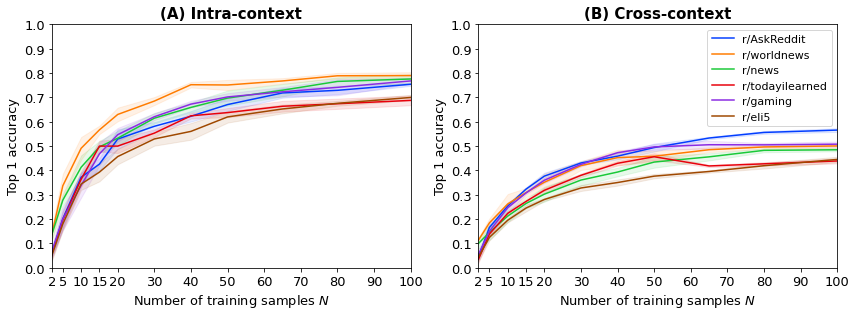

In [66]:
fig, axes = plt.subplots(1,2, figsize=(12, 4.5)) 
#fig, axes = plt.subplots(2,1, figsize=(5, 12)) 

#plt.xlim([2, 60])
plt.xlim([2, 110])
plt.ylim([0, None])

#palette = sns.color_palette([color_dict[x] for x in var_train_cross.Method.unique()])
#palette = sns.mpl_palette("Set1", 8)
#print(palette)
#palette[5] = (0.9, 0.9, 0)


# Intra-context AA.
sns.lineplot(x='num_training', y='top_1', ax=axes[0], 
                 data=var_train_intra[var_train_intra.num_training <101].reset_index().sort_values(['order']), 
                 hue="Method",
                 style='Method type',
                 ci="sd",
                 err_kws={'alpha': 0.1}, 
                 seed=0)
# Cross-context AA.
sns.lineplot(x='num_training', y='top_1', ax=axes[1], 
                 data=var_train_cross[var_train_cross.num_training <101].reset_index().sort_values(['order']), 
                 hue="Method",
                 style='Method type',
                 ci="sd",
                 err_kws={'alpha': 0.1}, 
                 seed=0)

xticks = [2, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100]
#xticks = [2, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80]
#xticks = [2, 5, 10, 15, 20, 30, 40, 50]
yticks = np.arange(0, 1.01, 0.1)

axes[0].set_title('(A) Intra-context', fontsize=15, fontweight='bold')
axes[1].set_title('(B) Cross-context', fontsize=15, fontweight='bold')

for ax in axes:
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks, fontdict={'fontsize':13})
    ax.set_yticks(yticks)
    ax.set_yticklabels([f'{yt:.1f}' for yt in yticks], fontdict={'fontsize':13})    
    ax.set_xlim(2, 100)
    #ax.set_xlim(2, 50)
    ax.set_ylim([0, 1])
    ax.set_ylabel('Top 1 accuracy', fontsize=13)
    ax.set_xlabel('Number of training samples $N$', fontsize=13)

axes[0].get_legend().remove()
axes[1].get_legend().remove()
axes[1].legend(title = "", fontsize=13, bbox_to_anchor=(1.1, 1))

plt.legend(labels = ['r/AskReddit', 'r/worldnews', 'r/news', 'r/todayilearned', 'r/gaming', 'r/eli5'], fontsize = 11)
plt.tight_layout()
plt.savefig("1-increasing-training-data-" + method_name + ".jpg")
plt.show()

In [75]:
# SubReddit_Based Plotting for Exp 1
#Plot the result of applying all aa_methods on a specific anchor subreddit



subreddit_name = 'eli5'

var_train_intra = sub_dict[subreddit_name][(sub_dict[subreddit_name].type == "intra_context") & (sub_dict[subreddit_name].num_authors == 100)]#& (df.test_path==train_path)  & (df.train_path==train_path)]#.groupby(["method", "num_training"]).mean()

var_train_intra = var_train_intra.sort_values(by="order")

var_train_cross = sub_dict[subreddit_name][(sub_dict[subreddit_name].type == "cross_context") & (sub_dict[subreddit_name].num_authors == 100) ]#& (df.test_path==test_path)  & (df.train_path==train_path)]#.groupby(["method", "num_training"]).mean()

var_train_cross = var_train_cross.sort_values(by="order")

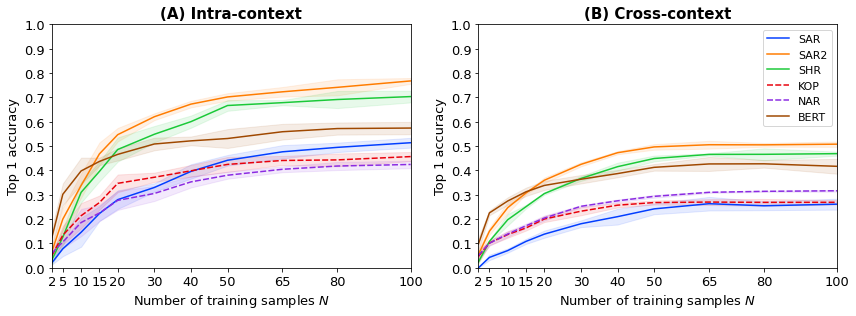

In [76]:
fig, axes = plt.subplots(1,2, figsize=(12, 4.5)) 
#fig, axes = plt.subplots(2,1, figsize=(5, 12)) 

plt.xlim([2, 110])
plt.ylim([0, None])

#palette = sns.color_palette([color_dict[x] for x in var_train_cross.Method.unique()])
#palette = sns.mpl_palette("Set1", 8)
#print(palette)
#palette[5] = (0.9, 0.9, 0)
sns.set_palette(palette)

# Intra-context AA.
sns.lineplot(x='num_training', y='top_1', ax=axes[0], 
                 data=var_train_intra[var_train_intra.num_training <101].reset_index().sort_values(['order']), 
                 hue="Method",
                 style='Method type',
                 ci="sd",
                 err_kws={'alpha': 0.1}, 
                 seed=0)
# Cross-context AA.
sns.lineplot(x='num_training', y='top_1', ax=axes[1], 
                 data=var_train_cross[var_train_cross.num_training <101].reset_index().sort_values(['order']), 
                 hue="Method",
                 style='Method type',
                 ci="sd",
                 err_kws={'alpha': 0.1}, 
                 seed=0)

xticks = [2, 5, 10, 15, 20, 30, 40, 50, 65, 80, 100]
#xticks = [2, 5, 10, 15, 20, 30, 40, 50]
yticks = np.arange(0, 1.01, 0.1)

axes[0].set_title('(A) Intra-context', fontsize=15, fontweight='bold')
axes[1].set_title('(B) Cross-context', fontsize=15, fontweight='bold')

for ax in axes:
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks, fontdict={'fontsize':13})
    ax.set_yticks(yticks)
    ax.set_yticklabels([f'{yt:.1f}' for yt in yticks], fontdict={'fontsize':13})    
    ax.set_xlim(2, 100)
    #ax.set_xlim(2, 50)
    ax.set_ylim([0, 1])
    ax.set_ylabel('Top 1 accuracy', fontsize=13)
    ax.set_xlabel('Number of training samples $N$', fontsize=13)

axes[0].get_legend().remove()
axes[1].get_legend().remove()
axes[1].legend(title = "", fontsize=13, bbox_to_anchor=(1.1, 1))

plt.legend(labels = ['SAR', 'SAR2', 'SHR', 'KOP', 'NAR', 'BERT'], fontsize = 11)
plt.tight_layout()
plt.savefig("1-increasing-training-data-"+ subreddit_name + ".jpg")
plt.show()

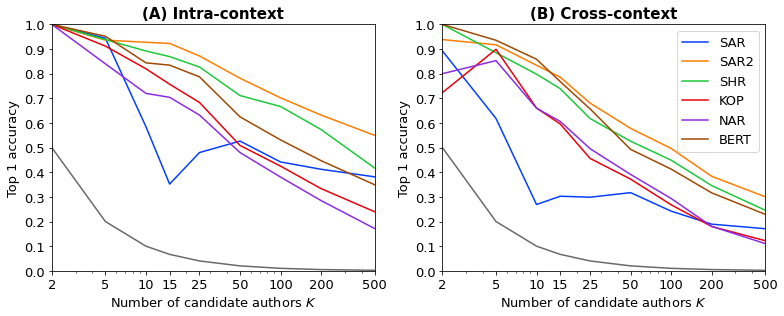

In [82]:
# Subreddit_Based Plotting for Exp 2
#Plot the result of applying a single aa_method on all anchor subreddit
subreddit_name = 'gaming'
subreddit_df = sub_dict[subreddit_name]


var_authors_intra = subreddit_df[(subreddit_df.type == "intra_context") & (subreddit_df.num_training == 50)  & (subreddit_df.num_authors > 1)].groupby(["Method", "num_authors", 'Method type']).mean()



var_authors_cross = subreddit_df[(subreddit_df.type == "cross_context") & (subreddit_df.num_training == 50)  & (subreddit_df.num_authors > 1)].groupby(["Method", "num_authors", 'Method type']).mean()



#palette = sns.color_palette("bright", 6)
sns.set_palette(palette)

fig, axes = plt.subplots(1, 2, figsize=(11, 4.5))

#xticks = [2, 5, 10, 15, 25, 50, 100, 200, 500, 1000, 2000, 5000]
xticks = [2, 5, 10, 15, 25, 50, 100, 200, 500]
#xticks = [10, 15, 25, 50, 100, 200, 500]
sns.lineplot(x='num_authors', y='top_1',
             ax=axes[0],
             data=var_authors_intra.reset_index().sort_values(['order']), 
             hue="Method", 
             #style='Method',
             ci="sd",
             markers=True,
            legend=None)

sns.lineplot(x='num_authors', y='top_1',
             ax=axes[1],
             data=var_authors_cross.reset_index().sort_values(['order']), 
             hue="Method", 
             #style='Method',
             ci="sd",
             markers=True)

#xticklabels = ['2', '5', '10', '15', '25', '50', '100', '200', '500', '1k', '2k', '5k']
xticklabels = ['2', '5', '10', '15', '25', '50', '100', '200', '500']
#xticklabels = ['10', '15', '25', '50', '100', '200', '500']
yticks = np.arange(0, 1.01, 0.1)


for ax in axes:
    ax.plot(xticks, [1.0/x for x in xticks], color='dimgray')
    ax.set_xlabel('Number of candidate authors $K$', fontsize=13)
    ax.set_xscale('log')
    #ax.set_xlim(2, 2000)
    #ax.set_xlim(2, 500)
    ax.set_xlim(2, 500)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels, fontdict={'fontsize':13})
    ax.set_ylabel('Top 1 accuracy', fontsize=13)
    ax.set_yticks(yticks)
    ax.set_yticklabels([f'{yt:.1f}' for yt in yticks], fontdict={'fontsize':13})    
    ax.set_ylim([0, 1])

axes[0].set_title('(A) Intra-context', fontsize=15, fontweight='bold')
axes[1].set_title('(B) Cross-context', fontsize=15, fontweight='bold')

from matplotlib.lines import Line2D
handles, labels = axes[1].get_legend_handles_labels()
line = Line2D([0], [0], label='Random', color='dimgray')
handles.extend([line])
axes[1].legend(handles=handles, fontsize=11.5)
plt.legend(labels = ['SAR', 'SAR2', 'SHR', 'KOP', 'NAR', 'BERT'], fontsize = 13)
plt.tight_layout()
plt.savefig("2-increasing-number-authors-top1-" + subreddit_name + ".jpg", bbox_inches='tight')
plt.show()

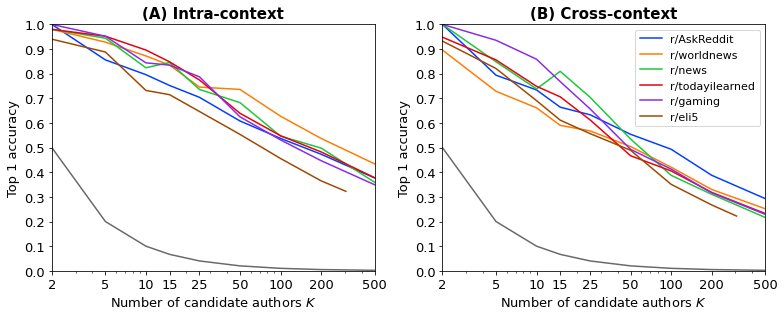

In [83]:
#Method_Based Plotting for Exp 2
#Plot the result of applying all aa_methods on a specific anchor subreddit
method_name = 'BERT'

var_authors_intra = df_AskReddit[(df_AskReddit.type == "intra_context") & (df_AskReddit.num_training == 50)  & (df_AskReddit.Method == method_name + "_AskReddit") & (df_AskReddit.num_authors > 1)].groupby(["Method", "num_authors", 'Method type']).mean()
var_authors_intra_2 = df_worldnews[(df_worldnews.type == "intra_context") & (df_worldnews.num_training == 50)  & (df_worldnews.Method == method_name + "_worldnews") & (df_worldnews.num_authors > 1)].groupby(["Method", "num_authors", 'Method type']).mean()
var_authors_intra_3 = df_news[(df_news.type == "intra_context") & (df_news.num_training == 50)  & (df_news.Method == method_name + "_news") & (df_news.num_authors > 1)].groupby(["Method", "num_authors", 'Method type']).mean()
var_authors_intra_4 = df_todayilearned[(df_todayilearned.type == "intra_context") & (df_todayilearned.num_training == 50)  & (df_todayilearned.Method == method_name + "_todayilearned") & (df_todayilearned.num_authors > 1)].groupby(["Method", "num_authors", 'Method type']).mean()
var_authors_intra_5 = df_gaming[(df_gaming.type == "intra_context") & (df_gaming.num_training == 50)  & (df_gaming.Method == method_name + "_gaming") & (df_gaming.num_authors > 1)].groupby(["Method", "num_authors", 'Method type']).mean()
var_authors_intra_6 = df_eli5[(df_eli5.type == "intra_context") & (df_eli5.num_training == 50)  & (df_eli5.Method == method_name + "_eli5") & (df_eli5.num_authors > 1)].groupby(["Method", "num_authors", 'Method type']).mean()
var_authors_intra = pd.concat([var_authors_intra, var_authors_intra_2, var_authors_intra_3, var_authors_intra_4, var_authors_intra_5, var_authors_intra_6])


var_authors_cross = df_AskReddit[(df_AskReddit.type == "cross_context") & (df_AskReddit.num_training == 50)  & (df_AskReddit.Method == method_name + "_AskReddit") & (df_AskReddit.num_authors > 1)].groupby(["Method", "num_authors", 'Method type']).mean()
var_authors_cross_2 = df_worldnews[(df_worldnews.type == "cross_context") & (df_worldnews.num_training == 50)  & (df_worldnews.Method == method_name + "_worldnews") & (df_worldnews.num_authors > 1)].groupby(["Method", "num_authors", 'Method type']).mean()
var_authors_cross_3 = df_news[(df_news.type == "cross_context") & (df_news.num_training == 50)  & (df_news.Method == method_name + "_news") & (df_news.num_authors > 1)].groupby(["Method", "num_authors", 'Method type']).mean()
var_authors_cross_4 = df_todayilearned[(df_todayilearned.type == "cross_context") & (df_todayilearned.num_training == 50)  & (df_todayilearned.Method == method_name + "_todayilearned") & (df_todayilearned.num_authors > 1)].groupby(["Method", "num_authors", 'Method type']).mean()
var_authors_cross_5 = df_gaming[(df_gaming.type == "cross_context") & (df_gaming.num_training == 50)  & (df_gaming.Method == method_name + "_gaming") & (df_gaming.num_authors > 1)].groupby(["Method", "num_authors", 'Method type']).mean()
var_authors_cross_6 = df_eli5[(df_eli5.type == "cross_context") & (df_eli5.num_training == 50)  & (df_eli5.Method == method_name + "_eli5") & (df_eli5.num_authors > 1)].groupby(["Method", "num_authors", 'Method type']).mean()
var_authors_cross = pd.concat([var_authors_cross, var_authors_cross_2, var_authors_cross_3, var_authors_cross_4, var_authors_cross_5, var_authors_cross_6])


#palette = sns.color_palette("bright", 6)
sns.set_palette(palette)

fig, axes = plt.subplots(1, 2, figsize=(11, 4.5))

#xticks = [2, 5, 10, 15, 25, 50, 100, 200, 500, 1000, 2000, 5000]
xticks = [2, 5, 10, 15, 25, 50, 100, 200, 500]
#xticks = [10, 15, 25, 50, 100, 200, 500]
sns.lineplot(x='num_authors', y='top_1',
             ax=axes[0],
             data=var_authors_intra.reset_index().sort_values(['order']), 
             hue="Method", 
             #style='Method',
             ci="sd",
             markers=True,
            legend=None)

sns.lineplot(x='num_authors', y='top_1',
             ax=axes[1],
             data=var_authors_cross.reset_index().sort_values(['order']), 
             hue="Method", 
             #style='Method',
             ci="sd",
             markers=True)

#xticklabels = ['2', '5', '10', '15', '25', '50', '100', '200', '500', '1k', '2k', '5k']
xticklabels = ['2', '5', '10', '15', '25', '50', '100', '200', '500']
#xticklabels = ['10', '15', '25', '50', '100', '200', '500']
yticks = np.arange(0, 1.01, 0.1)


for ax in axes:
    ax.plot(xticks, [1.0/x for x in xticks], color='dimgray')
    ax.set_xlabel('Number of candidate authors $K$', fontsize=13)
    ax.set_xscale('log')
    #ax.set_xlim(2, 2000)
    #ax.set_xlim(2, 500)
    ax.set_xlim(2, 500)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels, fontdict={'fontsize':13})
    ax.set_ylabel('Top 1 accuracy', fontsize=13)
    ax.set_yticks(yticks)
    ax.set_yticklabels([f'{yt:.1f}' for yt in yticks], fontdict={'fontsize':13})    
    ax.set_ylim([0, 1])

axes[0].set_title('(A) Intra-context', fontsize=15, fontweight='bold')
axes[1].set_title('(B) Cross-context', fontsize=15, fontweight='bold')

from matplotlib.lines import Line2D
handles, labels = axes[1].get_legend_handles_labels()
line = Line2D([0], [0], label='Random', color='dimgray')
handles.extend([line])
axes[1].legend(handles=handles, fontsize=11.5)
plt.legend(labels = ['r/AskReddit', 'r/worldnews', 'r/news', 'r/todayilearned', 'r/gaming', 'r/eli5'], fontsize = 11, loc = 'upper right')
plt.tight_layout()
plt.savefig("2-increasing-number-authors-top1-" + method_name + ".jpg", bbox_inches='tight')
plt.show()

In [16]:
#Exp 3
data_path= ""
df_sl = pd.read_csv(data_path + "test_exp_sl_eli5_metrics.csv", index_col=0)

In [17]:
df_sl["order"] = df_sl.method.apply(lambda x: order_dict[x])

In [18]:
df_sl = df_sl.rename(columns={'method': 'Method'})
df_sl.loc[df_sl['Method'].isin(['KOP_eli5', 'SAE', 'SAR3', 'NAR_eli5']), 'Method type'] = 'similarity-based' 
df_sl.loc[df_sl['Method'].isin(['BERT_eli5', 'SAR_eli5', 'SAR2_eli5', 'SHR_eli5']), 'Method type'] = 'classification' 
df_sl.head()

,num_authors,type,Method,sample_length,num_training,train_path,test_path,top_1,top_5,top_10,top_100,auroc_1,auroc_2,auroc_3,tpr,fpr,order,Method type
d0557326-ed36-4a8f-bf64-741cf0135bbd,100,intra_context,SAR2_eli5,50,250,data/processed_eli5_50.csv,data/processed_eli5_50.csv,0.224000,0.466000,0.598400,1,NaN,NaN,NaN,NaN,NaN,12,classification
b92df9fa-ddbd-4c38-b265-3ffa064dc57c,100,cross_context,SAR2_eli5,50,250,data/processed_eli5_50.csv,data/processed_eli5_50.csv,0.161074,0.367314,0.499132,1,NaN,NaN,NaN,NaN,NaN,12,classification
ec3a3305-b075-4438-97bd-6afd96953795,100,intra_context,SAR2_eli5,50,250,data/processed_eli5_50.csv,data/processed_eli5_50.csv,0.218000,0.446000,0.585600,1,NaN,NaN,NaN,NaN,NaN,12,classification
7572eb37-7ea8-4fdd-97d5-7bbf36998c5c,100,cross_context,SAR2_eli5,50,250,data/processed_eli5_50.csv,data/processed_eli5_50.csv,0.155372,0.359917,0.493017,1,NaN,NaN,NaN,NaN,NaN,12,classification
97f9ba39-861d-4613-882a-ee3948ab9e5a,100,intra_context,SAR2_eli5,50,250,data/processed_eli5_50.csv,data/processed_eli5_50.csv,0.192400,0.429600,0.563600,1,NaN,NaN,NaN,NaN,NaN,12,classification


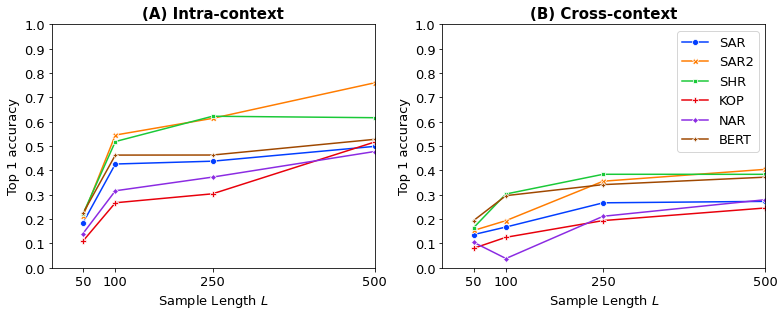

In [36]:
subreddit_df = df_sl


var_sample_intra = subreddit_df[(subreddit_df.type == "intra_context")  & (subreddit_df.num_authors > 1)].groupby(["Method", "sample_length", 'Method type']).mean()



var_sample_cross = subreddit_df[(subreddit_df.type == "cross_context")  & (subreddit_df.num_authors > 1)].groupby(["Method", "sample_length", 'Method type']).mean()



sns.set_palette(palette)

fig, axes = plt.subplots(1, 2, figsize=(11, 4.5))

#xticks = [2, 5, 10, 15, 25, 50, 100, 200, 500, 1000, 2000, 5000]
xticks = [50, 100, 250, 500]
#xticks = [10, 15, 25, 50, 100, 200, 500]
sns.lineplot(x='sample_length', y='top_1',
             ax=axes[0],
             data=var_sample_intra.reset_index().sort_values(['order']), 
             hue="Method", 
             style='Method',
             ci="sd",
             markers=True,
             dashes = False,
            legend=None)

sns.lineplot(x='sample_length', y='top_1',
             ax=axes[1],
             data=var_sample_cross.reset_index().sort_values(['order']), 
             hue="Method", 
             style='Method',
             dashes = False,
             ci="sd",
             markers=True)

#xticklabels = ['2', '5', '10', '15', '25', '50', '100', '200', '500', '1k', '2k', '5k']
xticklabels = ['50', '100', '250', '500']
#xticklabels = ['10', '15', '25', '50', '100', '200', '500']
yticks = np.arange(0, 1.01, 0.1)


for ax in axes:
    #ax.plot(xticks, [1.0/x for x in xticks], color='dimgray')
    ax.set_xlabel('Sample Length $L$', fontsize=13)
    #ax.set_xscale('log')
    #ax.set_xlim(2, 2000)
    #ax.set_xlim(2, 500)
    ax.set_xlim(2, 500)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels, fontdict={'fontsize':13})
    ax.set_ylabel('Top 1 accuracy', fontsize=13)
    ax.set_yticks(yticks)
    ax.set_yticklabels([f'{yt:.1f}' for yt in yticks], fontdict={'fontsize':13})    
    ax.set_ylim([0, 1])

axes[0].set_title('(A) Intra-context', fontsize=15, fontweight='bold')
axes[1].set_title('(B) Cross-context', fontsize=15, fontweight='bold')

from matplotlib.lines import Line2D
handles, labels = axes[1].get_legend_handles_labels()
#line = Line2D([0], [0], label='Random', color='dimgray')
#handles.extend([line])
axes[1].legend(handles=handles, fontsize=11.5)
plt.legend(labels = ['SAR', 'SAR2', 'SHR', 'KOP', 'NAR', 'BERT'], fontsize = 13)
#plt.legend(labels = ['SAR2'], fontsize = 13)
plt.tight_layout()
plt.savefig("3-Varying-Length-of-Data-Samples-" + 'eli5' + ".jpg", bbox_inches='tight')
plt.show()